In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
image_1 = train_images[0]

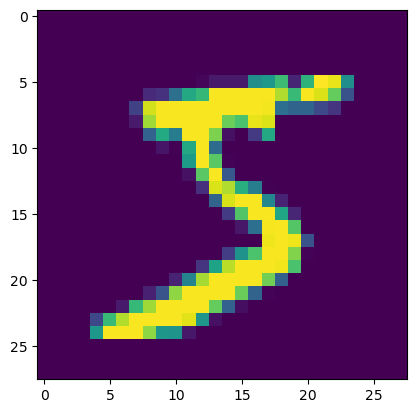

In [6]:
from matplotlib import pyplot as plt
plt.imshow(image_1, interpolation = 'nearest')
plt.show()

In [7]:
train_labels[0]

5

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(256, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

In [24]:
model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") /255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

In [26]:
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.1515 - loss: 2.2857
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5038 - loss: 2.0009
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6788 - loss: 1.3631
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7733 - loss: 0.9465
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8146 - loss: 0.7309
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8417 - loss: 0.6015
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8568 - loss: 0.5374
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8665 - loss: 0.4897
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8737 - loss: 0.4607
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8821 - loss: 0.4287


In [27]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([1.5017265e-04, 1.2232097e-06, 4.2994423e-05, 8.1436784e-04,
       1.9213741e-05, 1.6567382e-04, 1.4927117e-07, 9.9331653e-01,
       2.2680490e-05, 5.4671103e-03], dtype=float32)

In [28]:
predictions[0].argmax()

7

In [29]:
predictions[0][7]

0.99331653

In [30]:
test_labels[0]

7

In [31]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation= 'relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'softmax')
])

In [32]:
model2.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [33]:
train_image = train_images.reshape((60000, 28 * 28))
train_image = train_images.astype("float32") /255
test_image = test_images.reshape((10000, 28*28))
test_image = test_images.astype("float32") / 255

In [34]:
model2.fit(train_image, train_labels, epochs = 10, batch_size = 128)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 784), dtype=float32). Expected shape (None, 150, 150, 3), but input has incompatible shape (None, 784)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 784), dtype=float32)
  • training=True
  • mask=None